In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_regression,make_circles,make_s_curve
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn import decomposition
from factor_analyzer import FactorAnalyzer

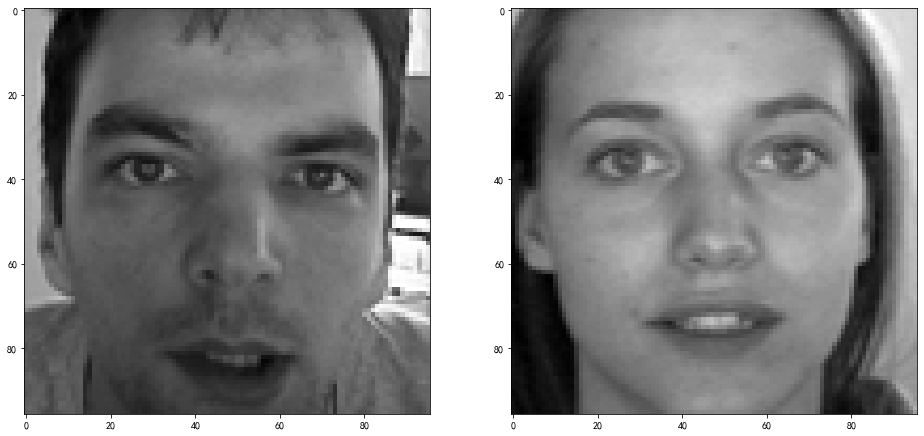

In [2]:
data=pd.read_csv('脸部数据.txt',header=0)   #第30列为像素数据
tmp=data.iloc[0:10,30]
X=[]
for i in np.arange(len(tmp)):
    Xstr=tmp[i].split(" ")
    X.append(np.array([int(x) for x in Xstr ]))
             
np.random.seed(1)
ids=np.random.choice(len(X),2)
plt.figure(figsize=(16,8))
for i,item in enumerate(ids):
    img=np.array(X[item].reshape((96,96)))
    plt.subplot(1,2,i+1)
    plt.imshow(img,cmap=cm.gray)
plt.show()

代码说明：
（1）第1，2行：读入人脸灰度点阵数据。数据文件的第30列为96×96的灰度点阵数据。仅读取前30张脸部数据。
（2）第3至6行：整理点阵数据。
利用for循环整理每张脸部点阵数据。原始数据以字符串形式存储96×96个灰度值，各个灰度值以空格分割。依据空格拆分字符串得到96×96个灰度值存储于列表中。
（3）第8，9行：随机抽取两张脸的点阵数据。
（4）第11至14行：可视化两张脸的点阵数据。

(96, 96) (96,) (96, 96)


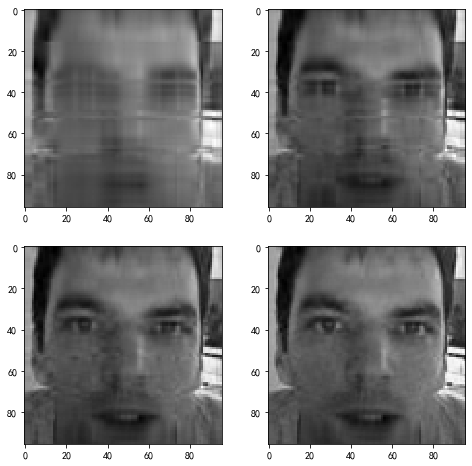

(96, 96) (96,) (96, 96)


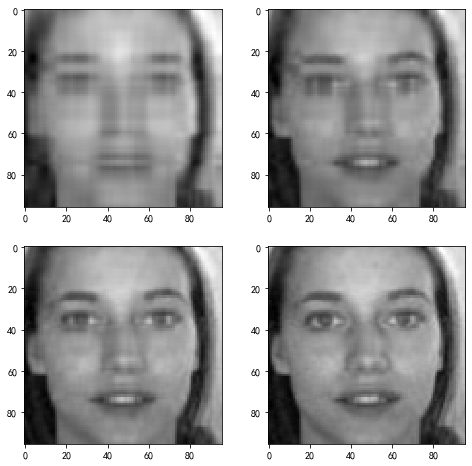

In [3]:
for i,item in enumerate(ids):
    U, D,Vt=np.linalg.svd(X[item].reshape((96,96)),full_matrices=True)
    print(U.shape,D.shape,Vt.shape)
    plt.figure(figsize=(8,8))
    ks=[5,10,15,20]
    for i,k in enumerate(ks):
        D0=np.mat(diag(D[0:k]))
        img=U[:,:k]*D0*Vt[:k,:]
        plt.subplot(2,2,i+1)
        plt.imshow(img,cmap=cm.gray)
    plt.show()
    

代码说明：
（1）第2行：利用函数np.linalg.svd()对当前脸部灰度矩阵X进行奇异值分解，分解所得三个成分依次存储于U,D,Vt中。
（2）第3行：输出U,D,Vt的形状（维度）。结果显示，U,Vt均为96×96的矩阵。Python将一维数组（包含96个元素）形式存储矩阵D的对角元素。
（3）第5行：指定选取前5,10,15,20个最大特征值。
（4）第6值10行：利用for循环，依次可视化选取前5,10,15,20个最大特征值时的奇异值分析结果。